In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from Kaggle
# Make sure the dataset file is in the same directory or provide the correct path
df = pd.read_csv("/kaggle/input/bank-dataset/bank-additional.csv", sep=';', quoting=3)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['"job"', '"marital"', '"education"', '"default"', '"housing"', '"loan"', '"contact"', '"month"', '"day_of_week"', '"poutcome"'], drop_first=True)



In [3]:
df.head()

,"""age""","""duration""","""campaign""","""pdays""","""previous""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""",...,"""month""_""may""","""month""_""nov""","""month""_""oct""","""month""_""sep""","""day_of_week""_""mon""","""day_of_week""_""thu""","""day_of_week""_""tue""","""day_of_week""_""wed""","""poutcome""_""nonexistent""","""poutcome""_""success"""
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,True,False,False,False,False,False,False,False,True,False
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,True,False,False,False,False,False,False,False,True,False
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,False,False,False,False,False,False,False,True,True,False
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,False,False,False,False,False,False,False,False,True,False
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,False,True,False,False,True,False,False,False,True,False


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   "age"                              4119 non-null   int64  
 1   "duration"                         4119 non-null   int64  
 2   "campaign"                         4119 non-null   int64  
 3   "pdays"                            4119 non-null   int64  
 4   "previous"                         4119 non-null   int64  
 5   "emp.var.rate"                     4119 non-null   float64
 6   "cons.price.idx"                   4119 non-null   float64
 7   "cons.conf.idx"                    4119 non-null   float64
 8   "euribor3m"                        4119 non-null   float64
 9   "nr.employed"                      4119 non-null   float64
 10  "y"                                4119 non-null   object 
 11  "job"_"blue-collar"                4119 non-null   bool 

In [5]:
df.describe()

,"""age""","""duration""","""campaign""","""pdays""","""previous""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed"""
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**DECISION TREE CLASSIFIER**

In [6]:
# Split the data into features (X) and target (y)
X = df.drop('"y"', axis=1)  # Note the quotes around 'y'
y = df['"y"']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)



Accuracy: 0.88
Precision: 0.47
Recall: 0.47
F1 Score: 0.47

Confusion Matrix:
[[684  48]
 [ 49  43]]


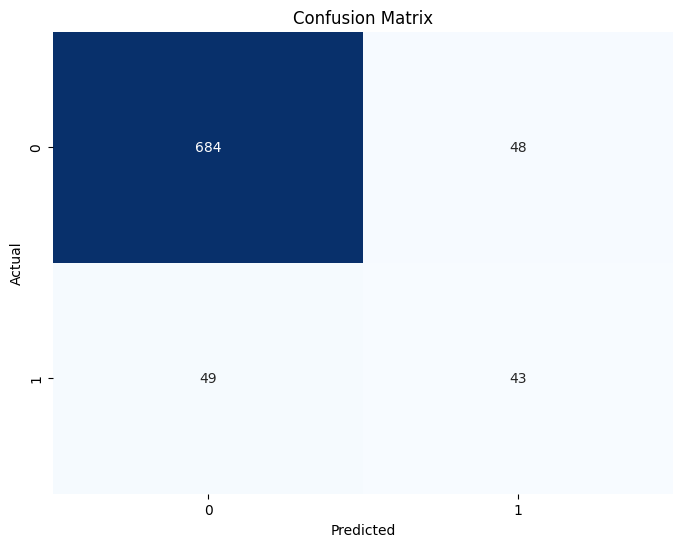


Classification Report:
              precision    recall  f1-score   support

        "no"       0.93      0.93      0.93       732
       "yes"       0.47      0.47      0.47        92

    accuracy                           0.88       824
   macro avg       0.70      0.70      0.70       824
weighted avg       0.88      0.88      0.88       824



In [7]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# Additional Evaluation Metrics
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

print("\nConfusion Matrix:")
print(conf_matrix)
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(class_report)